# Kasheme Walton's Data Science Personal Project

## Analysing 20,000 games of chess

This aim of this project is to analyse a kaggle dataset of 20,000 games of chess. The overarching objective is to uncover common patterns and trends related to chess openings. Primarily, we would like to reveal the most popular chess openings and opening variations, and inform a Beginner-Intermediate player of popular and successful opening strategies, based off of the findings.

This project will be split into two aspects:

**1) We will seek to answer a number of analytical questions for each popular opening & opening variation, including:**
- What is the average number of turns?
- Who is the most likely winner: white/black?
- What is the most/least likely result: resign/mate/draw?
- What is the average opening ply (avg number of moves in opening phase)?
- What are the most common opening moves typifying a said variation?

The information returned in this segment will be contained in an info pack for each popular opening and variation. Via an interactive game, the user can call an opening from a provided list followed by a variation. Once this has been specified, they will receive an info pack outlining the above data points for their selection.

**2) The second aspect of this project will be more geared towards Data Science and Machine Learning.**

Here the overall aim will be to utilise the 'moves' columns to uncover patterns related to the general pattern of a game, once it has been established that the players have entered a given opening. Naturally, this will be delivered through the use of an interactive chess game played out on a chess board interface.

Notes:
##### Ask user how they want to play? Which style they want to learn
- Categorise / label each opening variation into: Passive and Aggressive
- Base this off the average number of turns **is this accurate?*

- We must provide two pieces of analysis for each variation: Black/White
- We should ask the user which side they want to learn from in the 2nd or 3rd Input

## Data Understanding

### #1 Read the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_csv("chess_games.csv")

In [3]:
games.head(5)

,game_id,rated,start_time,end_time,start_time_clean,end_time_clean,turns,victory_status,winner,winner_rating_band2,...,black_rating_band,moves,opening_eco,opening_classification,opening_name,opening_ply,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,HgKLWPsz,False,1503350000000,1503350000000,15:03:00,15:03:00,39,mate,white,Intermediate,...,Intermediate,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,NaN,NaN,NaN,NaN
1,wNK2HdLb,True,1503450000000,1503450000000,15:03:00,15:03:00,58,mate,black,Intermediate,...,Intermediate,a4 e5 h4 d5 b3 Nc6 e3 Bf5 Bb5 Ne7 g4 Bd7 Bxc6 ...,A00,Polish (Sokolsky) opening,Crab Opening,3,NaN,game_id,NaN,NaN
2,t7vvcwqO,True,1504180000000,1504180000000,15:04:00,15:04:00,96,resign,black,Intermediate,...,Intermediate,g3 e5 e4 Nf6 Bg2 Bc5 a3 a5 Nc3 d6 h3 O-O b3 c6...,A00,Polish (Sokolsky) opening,Hungarian Opening,1,NaN,HgKLWPsz,NaN,NaN
3,facMwkUo,True,1504080000000,1504080000000,15:04:00,15:04:00,39,mate,white,Intermediate,...,Intermediate,e3 e6 Qf3 Nf6 Nc3 Nc6 Nb5 a6 Nd4 Nxd4 exd4 c5 ...,A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,NaN,wNK2HdLb,NaN,Van't Kruijs Opening
4,GstYv2mJ,False,1503600000000,1503600000000,15:03:00,15:03:00,28,mate,black,Intermediate,...,Intermediate,h4 e5 a4 d5 b4 Nc6 b5 Na5 g4 a6 b6 cxb6 g5 b5 ...,A00,Polish (Sokolsky) opening,Crab Opening,3,NaN,R5SfPQiB,NaN,Crab Opening


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 20058 non-null  object 
 1   rated                   20058 non-null  bool   
 2   start_time              20058 non-null  int64  
 3   end_time                20058 non-null  int64  
 4   start_time_clean        20058 non-null  object 
 5   end_time_clean          20058 non-null  object 
 6   turns                   20058 non-null  int64  
 7   victory_status          20058 non-null  object 
 8   winner                  20058 non-null  object 
 9   winner_rating_band2     19108 non-null  object 
 10  winner_rating_band      19108 non-null  object 
 11  white_id                20058 non-null  object 
 12  black_id                20058 non-null  object 
 13  white_rating            20058 non-null  int64  
 14  white_rating_band       20058 non-null

## Data Preparation

### #2 Clean the Data

### Remove unneeded columns

In [5]:
games.columns

Index(['game_id', 'rated', 'start_time', 'end_time', 'start_time_clean',
       'end_time_clean', 'turns', 'victory_status', 'winner',
       'winner_rating_band2', 'winner_rating_band', 'white_id', 'black_id',
       'white_rating', 'white_rating_band', 'black_rating',
       'black_rating_band', 'moves', 'opening_eco', 'opening_classification',
       'opening_name', 'opening_ply', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
games = games.drop(['start_time', 'end_time', 'start_time_clean', 'end_time_clean', 'winner_rating_band2', 'winner_rating_band', 'white_id', 
                'black_id', 'white_rating', 'white_rating_band', 'black_rating', 'black_rating_band','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25'], axis=1)


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 20058 non-null  object
 1   rated                   20058 non-null  bool  
 2   turns                   20058 non-null  int64 
 3   victory_status          20058 non-null  object
 4   winner                  20058 non-null  object
 5   moves                   20058 non-null  object
 6   opening_eco             20058 non-null  object
 7   opening_classification  20058 non-null  object
 8   opening_name            20058 non-null  object
 9   opening_ply             20058 non-null  int64 
dtypes: bool(1), int64(2), object(7)
memory usage: 1.4+ MB


In [8]:
games.head(5)

,game_id,rated,turns,victory_status,winner,moves,opening_eco,opening_classification,opening_name,opening_ply
0,HgKLWPsz,False,39,mate,white,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1
1,wNK2HdLb,True,58,mate,black,a4 e5 h4 d5 b3 Nc6 e3 Bf5 Bb5 Ne7 g4 Bd7 Bxc6 ...,A00,Polish (Sokolsky) opening,Crab Opening,3
2,t7vvcwqO,True,96,resign,black,g3 e5 e4 Nf6 Bg2 Bc5 a3 a5 Nc3 d6 h3 O-O b3 c6...,A00,Polish (Sokolsky) opening,Hungarian Opening,1
3,facMwkUo,True,39,mate,white,e3 e6 Qf3 Nf6 Nc3 Nc6 Nb5 a6 Nd4 Nxd4 exd4 c5 ...,A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1
4,GstYv2mJ,False,28,mate,black,h4 e5 a4 d5 b4 Nc6 b5 Na5 g4 a6 b6 cxb6 g5 b5 ...,A00,Polish (Sokolsky) opening,Crab Opening,3


### Split 'moves' column into seperate columns for first 8 moves

I have decided to use only the first 8 moves regardless of the opening ply for each game. The reason for this is the average number of moves in an opening phase is **8-12 moves**. 

In [9]:
games['moves'] = games['moves'].str.split()

In [10]:
games['moves'].head(5)

0    [e3, e6, d4, d6, Bd3, c6, Nf3, Be7, Nc3, Nf6, ...
1    [a4, e5, h4, d5, b3, Nc6, e3, Bf5, Bb5, Ne7, g...
2    [g3, e5, e4, Nf6, Bg2, Bc5, a3, a5, Nc3, d6, h...
3    [e3, e6, Qf3, Nf6, Nc3, Nc6, Nb5, a6, Nd4, Nxd...
4    [h4, e5, a4, d5, b4, Nc6, b5, Na5, g4, a6, b6,...
Name: moves, dtype: object

We will only return the first 8 moves as the average opening phase, according to Google, is **8-12 moves**.

In [11]:
games['moves'] = games['moves'].apply(lambda x:x[:10])

In [12]:
print(games['moves'].head(5))

0       [e3, e6, d4, d6, Bd3, c6, Nf3, Be7, Nc3, Nf6]
1        [a4, e5, h4, d5, b3, Nc6, e3, Bf5, Bb5, Ne7]
2        [g3, e5, e4, Nf6, Bg2, Bc5, a3, a5, Nc3, d6]
3    [e3, e6, Qf3, Nf6, Nc3, Nc6, Nb5, a6, Nd4, Nxd4]
4          [h4, e5, a4, d5, b4, Nc6, b5, Na5, g4, a6]
Name: moves, dtype: object


In [13]:
#This will separate each move / each element in the 'moves' list into its own column as specified 
#syntax = df[['new','column', 'names']] = pd.DataFrame(df.columntoseparate.tolist(), index = df.index)
games[['move1','move2','move3','move4','move5','move6','move7','move8',
      'move9','move10']] = pd.DataFrame(games.moves.tolist(), index = games.index)
games.head(5)

,game_id,rated,turns,victory_status,winner,moves,opening_eco,opening_classification,opening_name,opening_ply,move1,move2,move3,move4,move5,move6,move7,move8,move9,move10
0,HgKLWPsz,False,39,mate,white,"[e3, e6, d4, d6, Bd3, c6, Nf3, Be7, Nc3, Nf6]",A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,e3,e6,d4,d6,Bd3,c6,Nf3,Be7,Nc3,Nf6
1,wNK2HdLb,True,58,mate,black,"[a4, e5, h4, d5, b3, Nc6, e3, Bf5, Bb5, Ne7]",A00,Polish (Sokolsky) opening,Crab Opening,3,a4,e5,h4,d5,b3,Nc6,e3,Bf5,Bb5,Ne7
2,t7vvcwqO,True,96,resign,black,"[g3, e5, e4, Nf6, Bg2, Bc5, a3, a5, Nc3, d6]",A00,Polish (Sokolsky) opening,Hungarian Opening,1,g3,e5,e4,Nf6,Bg2,Bc5,a3,a5,Nc3,d6
3,facMwkUo,True,39,mate,white,"[e3, e6, Qf3, Nf6, Nc3, Nc6, Nb5, a6, Nd4, Nxd4]",A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,e3,e6,Qf3,Nf6,Nc3,Nc6,Nb5,a6,Nd4,Nxd4
4,GstYv2mJ,False,28,mate,black,"[h4, e5, a4, d5, b4, Nc6, b5, Na5, g4, a6]",A00,Polish (Sokolsky) opening,Crab Opening,3,h4,e5,a4,d5,b4,Nc6,b5,Na5,g4,a6


### 3) Analyse the Data

#### What are the top 10 most commonly used openings?

In [14]:
openings = games['opening_classification'].unique()
print(openings)

['Polish (Sokolsky)  opening' 'Nimzovich-Larsen attack' "Bird's opening"
 'Reti opening' 'English opening' "Queen's pawn"
 'Modern defence, Averbakh system' 'Old Benoni defence' "King's pawn game"
 "Queen's Indian defence" "King's Indian, East Indian defence"
 'Budapest defence' 'Old Indian defence' 'Benoni defence' 'Benko gambit'
 'Dutch' "King's pawn opening" 'Scandinavian (centre counter) defence'
 "Alekhine's defence" 'Robatsch (modern) defence' 'Pirc defence'
 'Caro-Kann defence' "Queen's pawn game" 'French defence'
 'Sicilian defence' 'Centre game' "Bishop's opening" 'Vienna game'
 "King's gambit" "King's knight opening" "Philidor's defence"
 "Petrov's defence" 'Scotch game' 'Three knights game'
 'Four knights, Scotch variation' 'Evans gambit' 'Giuoco Piano'
 'Two knights defence' 'Ruy Lopez (Spanish opening)'
 'Richter-Veresov attack' 'Torre attack (Tartakower variation)'
 "Queen's Gambit" "Queen's Gambit Declined, Chigorin defence"
 "Queen's Gambit Declined Slav defence"
 "Quee

We are only concerned with the top 10 openings that were used most often, as we don't want to be informing beginner-intermediate players of rare openings that are uncommonly used. Analysing instead commonly used openings which newer players are more likely to see, ensures we are focusing the study to the target audience. Subsequently, we will then study the top 10 opening variations for each of these 10 common openings. 

In [15]:
games['opening_classification'].value_counts().nlargest(10)

Sicilian defence                         2617
Queen's pawn game                        1661
King's pawn game                         1588
French defence                           1491
Polish (Sokolsky)  opening               1007
Ruy Lopez (Spanish opening)               858
Scandinavian (centre counter) defence     716
Queen's pawn                              693
Philidor's defence                        691
English opening                           676
Name: opening_classification, dtype: int64

In [16]:
top10openings = ["Sicilian defence", "Queen's pawn game", "King's pawn game", "French defence", "Polish (Sokolsky)  opening", "Ruy Lopez (Spanish opening)", "Scandinavian (centre counter) defence", "Queen's pawn", "Philidor's defence", "English opening"]

Filter the games dataframe to only contain games which have a top 10 opening.

In [17]:
variations = games["opening_name"]
variations_counts = variations.value_counts()


In [18]:
opening_bool = (games["opening_classification"] == "Sicilian defence") | (games["opening_classification"] == "Queen's pawn game") | (games["opening_classification"] == "King's pawn game") | (games["opening_classification"] == "French defence") | (games["opening_classification"] == "Polish (Sokolsky)  opening") | (games["opening_classification"] == "Ruy Lopez (Spanish opening)") | (games["opening_classification"] == "Scandinavian (centre counter) defence") | (games["opening_classification"] == "Queen's pawn") | (games["opening_classification"] == "Philidor's defence") | (games["opening_classification"] == "English opening")  
games = games.loc[opening_bool]
print(games.describe())
print(games.info())


              turns   opening_ply
count  11998.000000  11998.000000
mean      60.839807      4.482330
std       33.589784      2.762044
min        1.000000      1.000000
25%       37.000000      3.000000
50%       56.000000      4.000000
75%       79.000000      6.000000
max      255.000000     28.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11998 entries, 0 to 19624
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 11998 non-null  object
 1   rated                   11998 non-null  bool  
 2   turns                   11998 non-null  int64 
 3   victory_status          11998 non-null  object
 4   winner                  11998 non-null  object
 5   moves                   11998 non-null  object
 6   opening_eco             11998 non-null  object
 7   opening_classification  11998 non-null  object
 8   opening_name            11998 non-null  object
 9   opening_

### Current Observations
- Current length of the dataframe is 11998
- Some games do not have moves played in moves 3-10. The 5 games that don't have a move 2 were probably cancelled, since player 2 never moved a piece. 
- There appears to be some missing data in the moves columns. We would expect this as some really quick games can end with only a handful of moves. Bare in mind that missing data in the moves columns will be cumulative from the first non-played move column. So we should only be interested in the count of individual games showing missing data in a move column, not the sum of missing data itself. 



### Missing data

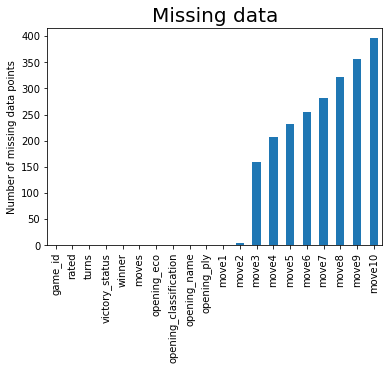

In [19]:
missing = games.isnull().sum()
missing.plot(kind="bar")

plt.title('Missing data',size=20)
plt.ylabel('Number of missing data points')
plt.show()

In [20]:
num_games_missing_moves_1_to_10 = sum(games['move10'].isnull())
percentage_missing = int(num_games_missing_moves_1_to_10 / len(games) * 100)

print('Percentage of games missing moves 1-10: {}%'.format(percentage_missing))


Percentage of games missing moves 1-10: 3%


As we can see, there are not a lot of games that show missing data for the moves columns, and there is only missing data in these columns. The linear trajectrory of the bar graph also indicates the cumulative nature of the missing data, as I previously mentioned. Only 3% of games in the remaining DataFrame don't have moves in the first 10 moves. Therefore, it is probably best to remove these games from the dataframe as it is an insignificant amount. This will ensure consistency later when we enter the machine learning phase.

In [21]:
# Remove games displaying no moves in moves 1-10. 
games = games.dropna(axis=0)
print(games.isnull().sum())
print(games.info())

game_id                   0
rated                     0
turns                     0
victory_status            0
winner                    0
moves                     0
opening_eco               0
opening_classification    0
opening_name              0
opening_ply               0
move1                     0
move2                     0
move3                     0
move4                     0
move5                     0
move6                     0
move7                     0
move8                     0
move9                     0
move10                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11602 entries, 0 to 19624
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 11602 non-null  object
 1   rated                   11602 non-null  bool  
 2   turns                   11602 non-null  int64 
 3   victory_status          11602 non-null  object
 4   w

#### Create three columns for each result (white wins, black wins, draw)
- we will create new column with 1,0 counts for each column where the condition is met
- we will then draw upon this later when we do our aggregation by summing the column and/or creating %s for each

In [22]:
games.loc[games.winner == "white", "white_wins"] = 1
games.loc[games.winner != "white", "white_wins"] = 0

In [23]:
games.loc[games.winner == "black", "black_wins"] = 1
games.loc[games.winner != "black", "black_wins"] = 0

In [24]:
games.loc[games.winner == "draw", "draw"] = 1
games.loc[games.winner != "draw", "draw"] = 0

In [25]:
games.head(5)

,game_id,rated,turns,victory_status,winner,moves,opening_eco,opening_classification,opening_name,opening_ply,...,move4,move5,move6,move7,move8,move9,move10,white_wins,black_wins,draw
0,HgKLWPsz,False,39,mate,white,"[e3, e6, d4, d6, Bd3, c6, Nf3, Be7, Nc3, Nf6]",A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,...,d6,Bd3,c6,Nf3,Be7,Nc3,Nf6,1.0,0.0,0.0
1,wNK2HdLb,True,58,mate,black,"[a4, e5, h4, d5, b3, Nc6, e3, Bf5, Bb5, Ne7]",A00,Polish (Sokolsky) opening,Crab Opening,3,...,d5,b3,Nc6,e3,Bf5,Bb5,Ne7,0.0,1.0,0.0
2,t7vvcwqO,True,96,resign,black,"[g3, e5, e4, Nf6, Bg2, Bc5, a3, a5, Nc3, d6]",A00,Polish (Sokolsky) opening,Hungarian Opening,1,...,Nf6,Bg2,Bc5,a3,a5,Nc3,d6,0.0,1.0,0.0
3,facMwkUo,True,39,mate,white,"[e3, e6, Qf3, Nf6, Nc3, Nc6, Nb5, a6, Nd4, Nxd4]",A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,...,Nf6,Nc3,Nc6,Nb5,a6,Nd4,Nxd4,1.0,0.0,0.0
4,GstYv2mJ,False,28,mate,black,"[h4, e5, a4, d5, b4, Nc6, b5, Na5, g4, a6]",A00,Polish (Sokolsky) opening,Crab Opening,3,...,d5,b4,Nc6,b5,Na5,g4,a6,0.0,1.0,0.0


#### Create three columns for each result (mate, resign, outoftime)
- we will not include draw as a victory status as this is already accounted for in the winner column
- we will create new columns with 1,0 counts for each column where the condition is met
- we will then draw upon this later when we do our aggregation by summing the column and/or creating %s for each



In [26]:
games['victory_status'].unique()

array(['mate', 'resign', 'outoftime', 'draw'], dtype=object)

In [27]:
games.loc[games.victory_status == 'mate','win_by_mate'] = 1
games.loc[games.victory_status != 'mate','win_by_mate'] = 0

In [28]:
games.loc[games.victory_status == 'resign', 'win_by_resign'] = 1
games.loc[games.victory_status != 'resign', 'win_by_resign'] = 0

In [29]:
games.loc[games.victory_status == 'outoftime', 'win_by_outoftime'] = 1
games.loc[games.victory_status != 'outoftime', 'win_by_outoftime'] = 0

#### Create a "Summary Table" which will be a DataFrame consisting of the following key descriptive components:
- avg num turns
- count/% winner (white/black)
- count/% result for each possibility (draw, resign, mate)
- average opening ply (num moves in opening phase)
- *What are the most common opening moves typifying a said variation?*

(this may be performed in a seperate phase)

#### First we need to filter the games dataframe to only include rows where there is a top 10 most common variation for each top 10 most common opening. (filter on frequency column later)

In [30]:
# Check that the counts from df below align with the variations, not the openings
bool_EO = games['opening_name'] == "English Opening"
print("English Opening ")
print(games['opening_name'][bool_EO].count())


English Opening 
22


In [31]:
games[(games['opening_classification'] =='English opening') & (games['opening_name'] == 'English Opening')]['winner'].value_counts()

black    12
white    10
Name: winner, dtype: int64

In [32]:
#Create the pivot table
games_pivot = games.pivot_table(index=['opening_classification','opening_name'],
                                values=['opening_eco','turns','opening_ply','white_wins','black_wins','draw',
                                       'win_by_resign','win_by_mate','win_by_outoftime'],
                               aggfunc={'opening_ply':np.mean,'turns':np.mean,
                                       'white_wins':np.sum,'black_wins':np.sum,'draw':np.sum,
                                       'win_by_resign':np.sum,'win_by_mate':np.sum,
                                        'win_by_outoftime':np.sum,'opening_eco':len},
                                fill_value=0)
games_pivot['%white_wins'] = round((games_pivot['white_wins']/
                                    games_pivot['opening_eco'])*100)
games_pivot['%black_wins'] = round((games_pivot['black_wins']/
                                    games_pivot['opening_eco'])*100)
games_pivot['%draw'] = round((games_pivot['draw']/
                              games_pivot['opening_eco'])*100)
games_pivot['%resign'] = round((games_pivot['win_by_resign']/
                              games_pivot['opening_eco'])*100)
games_pivot['%mate'] = round((games_pivot['win_by_mate']/
                              games_pivot['opening_eco'])*100)
games_pivot['%outoftime'] = round((games_pivot['win_by_outoftime']/
                              games_pivot['opening_eco'])*100)



In [33]:
games_pivot.head(10)

black_wins  \
opening_classification opening_name                                                     
English opening        English Opening                                             12   
                       English Opening: Achilles-Omega Gambit                       2   
                       English Opening: Agincourt Defense                           8   
                       English Opening: Agincourt Defense #2                        0   
                       English Opening: Agincourt Defense #3                        1   
                       English Opening: Agincourt Defense |  Catalan D...           1   
                       English Opening: Agincourt Defense |  Catalan D...           0   
                       English Opening: Agincourt Defense |  Neo-Catal...           1   
                       English Opening: Anglo-Dutch Defense                         6   
                       English Opening: Anglo-Gruenfeld Defense                     3   

                                                                           draw  \
opening_classification opening_name                                               
English opening        English Opening                                        0   
                       English Opening: Achilles-Omega Gambit                 0   
                       English Opening: Agincourt Defense                     2   
                       English Opening: Agincourt Defense #2                  1   
                       English Opening: Agincourt Defense #3                  0   
                       English Opening: Agincourt Defense |  Catalan D...     0   
                       English Opening: Agincourt Defense |  Catalan D...     0   
                       English Opening: Agincourt Defense |  Neo-Catal...     0   
                       English Opening: Anglo-Dutch Defense                   1   
                       English Opening: Anglo-Gruenfeld Defense               0   

                                                                           opening_eco  \
opening_classification opening_name                                                      
English opening        English Opening                                              22   
                       English Opening: Achilles-Omega Gambit                        2   
                       English Opening: Agincourt Defense                           31   
                       English Opening: Agincourt Defense #2                         7   
                       English Opening: Agincourt Defense #3                         7   
                       English Opening: Agincourt Defense |  Catalan D...            2   
                       English Opening: Agincourt Defense |  Catalan D...            1   
                       English Opening: Agincourt Defense |  Neo-Catal...            1   
                       English Opening: Anglo-Dutch Defense                         12   
                       English Opening: Anglo-Gruenfeld Defense                      6   

                                                                           opening_ply  \
opening_classification opening_name                                                      
English opening        English Opening                                             1.0   
                       English Opening: Achilles-Omega Gambit                      3.0   
                       English Opening: Agincourt Defense                          2.0   
                       English Opening: Agincourt Defense #2                       4.0   
                       English Opening: Agincourt Defense #3                       3.0   
                       English Opening: Agincourt Defense |  Catalan D...          6.0   
                       English Opening: Agincourt Defense |  Catalan D...          8.0   
                       English Opening: Agincourt Defense |  Neo-Catal...          9.0   
                       Engli

In [34]:
games_pivot.columns

Index(['black_wins', 'draw', 'opening_eco', 'opening_ply', 'turns',
       'white_wins', 'win_by_mate', 'win_by_outoftime', 'win_by_resign',
       '%white_wins', '%black_wins', '%draw', '%resign', '%mate',
       '%outoftime'],
      dtype='object')

### More data cleansing
- Reconstruct pivot table so opening name and variation are columns and not indexes
- Rename columns
- Reorder columns
- Round numbers / convert to integer

In [35]:
games_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 688 entries, ('English opening', 'English Opening') to ('Sicilian defence', 'Sicilian Defense: Wing Gambit |  Marshall Variation')
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   black_wins        688 non-null    int64  
 1   draw              688 non-null    int64  
 2   opening_eco       688 non-null    int64  
 3   opening_ply       688 non-null    float64
 4   turns             688 non-null    float64
 5   white_wins        688 non-null    int64  
 6   win_by_mate       688 non-null    int64  
 7   win_by_outoftime  688 non-null    int64  
 8   win_by_resign     688 non-null    int64  
 9   %white_wins       688 non-null    float64
 10  %black_wins       688 non-null    float64
 11  %draw             688 non-null    float64
 12  %resign           688 non-null    float64
 13  %mate             688 non-null    float64
 14  %outoftime        688 non-nul

In [36]:
# Reset index so opening name and classification can be columns
games_pivot.reset_index(level=0,inplace=True)
games_pivot.reset_index(level=0,inplace=True)

In [37]:
#games_pivot.set_index
games_pivot

,opening_name,opening_classification,black_wins,draw,opening_eco,opening_ply,turns,white_wins,win_by_mate,win_by_outoftime,win_by_resign,%white_wins,%black_wins,%draw,%resign,%mate,%outoftime
0,English Opening,English opening,12,0,22,1.0,71.000000,10,8,2,12,45.0,55.0,0.0,55.0,36.0,9.0
1,English Opening: Achilles-Omega Gambit,English opening,2,0,2,3.0,46.000000,0,2,0,0,0.0,100.0,0.0,0.0,100.0,0.0
2,English Opening: Agincourt Defense,English opening,8,2,31,2.0,63.709677,21,8,0,21,68.0,26.0,6.0,68.0,26.0,0.0
3,English Opening: Agincourt Defense #2,English opening,0,1,7,4.0,59.428571,6,3,1,2,86.0,0.0,14.0,29.0,43.0,14.0
4,English Opening: Agincourt Defense #3,English opening,1,0,7,3.0,65.142857,6,2,0,5,86.0,14.0,0.0,71.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Sicilian Defense: Wing Gambit,Sicilian defence,3,0,9,3.0,67.222222,6,1,1,7,67.0,33.0,0.0,78.0,11.0,11.0
684,Sicilian Defense: Wing Gambit Deferred,Sicilian defence,1,0,1,5.0,66.000000,0,1,0,0,0.0,100.0,0.0,0.0,100.0,0.0
685,Sicilian Defense: Wing Gambit | Carlsbad Vari...,Sicilian defence,2,0,5,6.0,45.800000,3,2,0,3,60.0,40.0,0.0,60.0,40.0,0.0
686,Sicilian Defense: Wing Gambit | Deferred Vari...,Sicilian defence,1,0,2,5.0,57.500000,1,2,0,0,50.0,50.0,0.0,0.0,100.0,0.0


In [38]:
# Reorder columns
games_summary = games_pivot[games_pivot.columns[[1,0,4,5,6,3,2,7,8,9,10,11,12,13,14,15,16]]]

In [39]:
# Rename columns
games_summary = games_summary.rename(columns={'opening_classification':'opening','opening_name':'variation',
                             'opening_ply':'avg_opening_ply','turns':'avg_turns',
                             'opening_eco':'frequency'})

In [40]:
# Round numbers / convert to integer type
games_summary['avg_turns'] = round(games_summary['avg_turns'])
games_summary

,opening,variation,frequency,avg_opening_ply,avg_turns,draw,black_wins,white_wins,win_by_mate,win_by_outoftime,win_by_resign,%white_wins,%black_wins,%draw,%resign,%mate,%outoftime
0,English opening,English Opening,22,1.0,71.0,0,12,10,8,2,12,45.0,55.0,0.0,55.0,36.0,9.0
1,English opening,English Opening: Achilles-Omega Gambit,2,3.0,46.0,0,2,0,2,0,0,0.0,100.0,0.0,0.0,100.0,0.0
2,English opening,English Opening: Agincourt Defense,31,2.0,64.0,2,8,21,8,0,21,68.0,26.0,6.0,68.0,26.0,0.0
3,English opening,English Opening: Agincourt Defense #2,7,4.0,59.0,1,0,6,3,1,2,86.0,0.0,14.0,29.0,43.0,14.0
4,English opening,English Opening: Agincourt Defense #3,7,3.0,65.0,0,1,6,2,0,5,86.0,14.0,0.0,71.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Sicilian defence,Sicilian Defense: Wing Gambit,9,3.0,67.0,0,3,6,1,1,7,67.0,33.0,0.0,78.0,11.0,11.0
684,Sicilian defence,Sicilian Defense: Wing Gambit Deferred,1,5.0,66.0,0,1,0,1,0,0,0.0,100.0,0.0,0.0,100.0,0.0
685,Sicilian defence,Sicilian Defense: Wing Gambit | Carlsbad Vari...,5,6.0,46.0,0,2,3,2,0,3,60.0,40.0,0.0,60.0,40.0,0.0
686,Sicilian defence,Sicilian Defense: Wing Gambit | Deferred Vari...,2,5.0,58.0,0,1,1,2,0,0,50.0,50.0,0.0,0.0,100.0,0.0


### Filter dataframe to only display commonly used opening variations per top 10 opening.
- conduct initial analysis on frequency column
- If variation frequency is below mean for that opening, remove from dataframe?
- use nlargest and for loop to loop through df?

In [41]:
# Initialise function for returning top 10 variations for each opening
# Result should be a df of most common variations of a specified opening
def find_top_10 (opening):
    opening_df = games_summary[games_summary["opening"] == opening]
    return opening_df.sort_values('frequency', ascending = False).head(10)
    

In [42]:
# Loop through games_summary df and apply function to each. Result should be a combined df of all filtered openings
# Create empty df to append new_df in each iteration
empty_df = pd.DataFrame()
for opening in games_summary['opening'].unique():
    new_data = find_top_10(opening)
    empty_df = pd.concat([empty_df, new_data], axis=0)
empty_df

    

,opening,variation,frequency,avg_opening_ply,avg_turns,draw,black_wins,white_wins,win_by_mate,win_by_outoftime,win_by_resign,%white_wins,%black_wins,%draw,%resign,%mate,%outoftime
32,English opening,English Opening: King's English Variation,94,2.063830,63.0,3,37,54,38,14,40,57.0,39.0,3.0,43.0,40.0,15.0
43,English opening,English Opening: King's English Variation | R...,45,3.000000,70.0,3,15,27,12,5,25,60.0,33.0,7.0,56.0,27.0,11.0
23,English opening,English Opening: Anglo-Scandinavian Defense,44,2.000000,61.0,0,17,27,14,6,24,61.0,39.0,0.0,55.0,32.0,14.0
54,English opening,English Opening: Symmetrical Variation,35,2.000000,66.0,0,15,20,8,3,24,57.0,43.0,0.0,69.0,23.0,9.0
2,English opening,English Opening: Agincourt Defense,31,2.000000,64.0,2,8,21,8,0,21,68.0,26.0,6.0,68.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Sicilian defence,Sicilian Defense: McDonnell Attack,68,3.000000,58.0,3,32,33,12,8,45,49.0,47.0,4.0,66.0,18.0,12.0
532,Sicilian defence,Sicilian Defense: Closed Variation,66,3.121212,60.0,4,31,31,17,2,43,47.0,47.0,6.0,65.0,26.0,3.0
625,Sicilian defence,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,66,5.000000,65.0,1,30,35,18,4,43,53.0,45.0,2.0,65.0,27.0,6.0
564,Sicilian defence,Sicilian Defense: French Variation,63,4.000000,70.0,4,34,25,18,13,28,40.0,54.0,6.0,44.0,29.0,21.0


In [43]:
top_games = empty_df

In [44]:
top_games = top_games.astype({'avg_opening_ply':'int64','avg_turns':'int64','%white_wins':'int64',
                       '%black_wins':'int64','%draw':'int64','%resign':'int64','%mate':'int64',
                      '%outoftime':'int64'})
top_games.dtypes


opening             object
variation           object
frequency            int64
avg_opening_ply      int64
avg_turns            int64
draw                 int64
black_wins           int64
white_wins           int64
win_by_mate          int64
win_by_outoftime     int64
win_by_resign        int64
%white_wins          int64
%black_wins          int64
%draw                int64
%resign              int64
%mate                int64
%outoftime           int64
dtype: object

In [45]:
top_games

,opening,variation,frequency,avg_opening_ply,avg_turns,draw,black_wins,white_wins,win_by_mate,win_by_outoftime,win_by_resign,%white_wins,%black_wins,%draw,%resign,%mate,%outoftime
32,English opening,English Opening: King's English Variation,94,2,63,3,37,54,38,14,40,57,39,3,43,40,15
43,English opening,English Opening: King's English Variation | R...,45,3,70,3,15,27,12,5,25,60,33,7,56,27,11
23,English opening,English Opening: Anglo-Scandinavian Defense,44,2,61,0,17,27,14,6,24,61,39,0,55,32,14
54,English opening,English Opening: Symmetrical Variation,35,2,66,0,15,20,8,3,24,57,43,0,69,23,9
2,English opening,English Opening: Agincourt Defense,31,2,64,2,8,21,8,0,21,68,26,6,68,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Sicilian defence,Sicilian Defense: McDonnell Attack,68,3,58,3,32,33,12,8,45,49,47,4,66,18,12
532,Sicilian defence,Sicilian Defense: Closed Variation,66,3,60,4,31,31,17,2,43,47,47,6,65,26,3
625,Sicilian defence,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,66,5,65,1,30,35,18,4,43,53,45,2,65,27,6
564,Sicilian defence,Sicilian Defense: French Variation,63,4,70,4,34,25,18,13,28,40,54,6,44,29,21


#### Classify each opening into Passive or Aggressive
- use avg number of turns column to determine labels: openings above mean = Passive, below mean = Aggressive
- Add column "opening_type" to top_games df and use if statement/function to assign label based off mean analysis

In [46]:
avg_turns_mean = top_games["avg_turns"].mean()
top_games.loc[top_games.avg_turns < avg_turns_mean, "opening_type"] = "Passive"
top_games.loc[top_games.avg_turns > avg_turns_mean, "opening_type"] = "Aggressive"
top_games["opening_type"].unique()

array(['Aggressive', 'Passive'], dtype=object)

## Data Analysis

#### What are the average number of turns for each opening?

In [47]:
# arrange dataframe for top10 openings and average number of turns
df_ope = top_games.pivot_table(index='opening',values='avg_turns').sort_values('avg_turns')
map(int, df_ope['avg_turns'].round())
df_ope


,avg_turns
opening,
Scandinavian (centre counter) defence,58.1
Polish (Sokolsky) opening,58.9
King's pawn game,59.1
Ruy Lopez (Spanish opening),61.6
French defence,62.8
English opening,64.0
Sicilian defence,64.0
Queen's pawn,64.3
Philidor's defence,64.8


In [48]:
#nums = list(df_ope['avg_turns'])
#nums

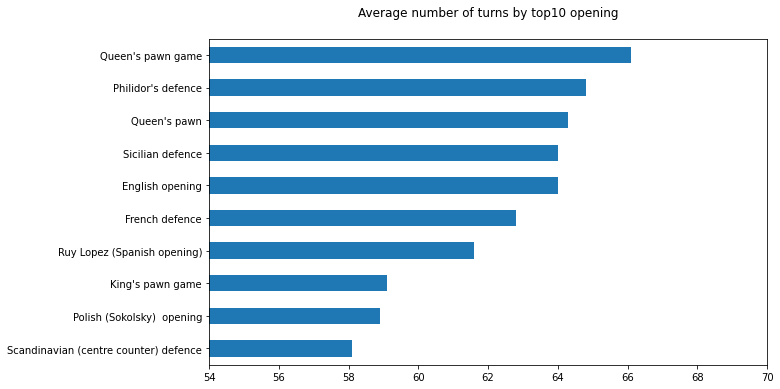

In [49]:
df_ope.plot(kind='barh',figsize=(10,6),legend=False)

plt.title('Average number of turns by top10 opening', y=1.05)
plt.xlabel('')
plt.ylabel('')
plt.xlim(54,70)

plt.show()

As the chart illustrates, the Queen's Pawn Game is the opening classification with the highest number of average turns (66), based off our top_games dataframe. In contrast, the Scandinavian (center counter) defence is the opening with the lowest average number of turns (58). Though this finding alone is not very informative, we will assess the correlation between the average number of turns and other key metrics.

#### What is the most likely result per top10 opening?

In [96]:
df_results_ope = top_games.loc[:, ['opening', 'variation','win_by_mate', 'win_by_outoftime', 'win_by_resign','draw']]

df_results_ope['Total'] = df_results_ope.sum(axis=1)
map(int, df_results_ope['Total'].round())

df_results_ope

,opening,variation,win_by_mate,win_by_outoftime,win_by_resign,draw,Total
32,English opening,English Opening: King's English Variation,38,14,40,3,95
43,English opening,English Opening: King's English Variation | R...,12,5,25,3,45
23,English opening,English Opening: Anglo-Scandinavian Defense,14,6,24,0,44
54,English opening,English Opening: Symmetrical Variation,8,3,24,0,35
2,English opening,English Opening: Agincourt Defense,8,0,21,2,31
...,...,...,...,...,...,...,...
597,Sicilian defence,Sicilian Defense: McDonnell Attack,12,8,45,3,68
532,Sicilian defence,Sicilian Defense: Closed Variation,17,2,43,4,66
625,Sicilian defence,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,18,4,43,1,66
564,Sicilian defence,Sicilian Defense: French Variation,18,13,28,4,63


In [97]:
#order dataframe to see which order the outcomes should be stacked in the bar chart. 
#We should have the outcome with the most data points at the bottom of the chart
order_check = df_results_ope
order_check['Total'] = order_check.sum(axis=1)
order_check = order_check.sort_values('Total', ascending = True).groupby(by='opening').mean()
order_check

,win_by_mate,win_by_outoftime,win_by_resign,draw,Total
opening,,,,,
English opening,112,44,205,12,746
French defence,277,68,479,45,1738
King's pawn game,364,72,501,41,1956
Philidor's defence,235,57,343,26,1322
Polish (Sokolsky) opening,336,56,319,28,1478
Queen's pawn,209,67,313,17,1212
Queen's pawn game,394,93,588,57,2264
Ruy Lopez (Spanish opening),176,33,279,22,1020
Scandinavian (centre counter) defence,228,47,339,22,1272


In [105]:
df_results_ope

,win_by_mate,win_by_outoftime,win_by_resign,draw,Total
opening,,,,,
English opening,112,44,205,12,746
French defence,277,68,479,45,1738
King's pawn game,364,72,501,41,1956
Philidor's defence,235,57,343,26,1322
Polish (Sokolsky) opening,336,56,319,28,1478
Queen's pawn,209,67,313,17,1212
Queen's pawn game,394,93,588,57,2264
Ruy Lopez (Spanish opening),176,33,279,22,1020
Scandinavian (centre counter) defence,228,47,339,22,1272


In [106]:
df_results_ope = df_results_ope.groupby(by='opening',axis=0).sum().sort_values('Total', ascending = True)

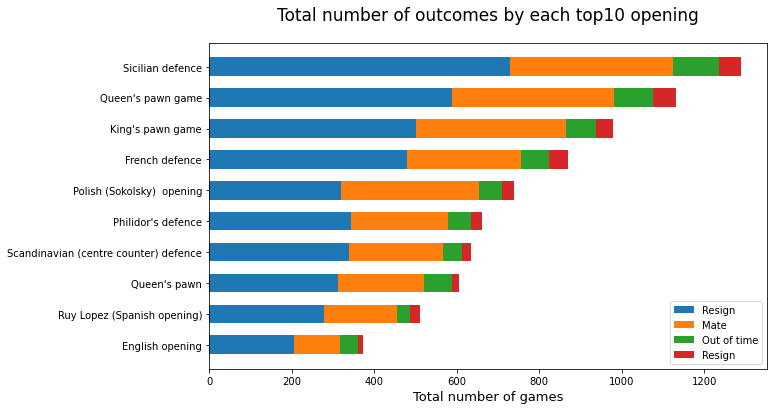

In [108]:
x = list(df_results_ope.index)

mate = df_results_ope['win_by_mate'].tolist()
outoftime = df_results_ope['win_by_outoftime'].tolist()
resign = df_results_ope['win_by_resign'].tolist()
draw = df_results_ope['draw'].tolist()

bottom_outoftime = list(np.add(resign, mate))
bottom_draw = list(np.add(bottom_outoftime, outoftime))

plt.barh(x, resign, 0.6, label='Resign')
plt.barh(x, mate, 0.6, left=resign, label='Mate')
plt.barh(x, outoftime, 0.6, left=bottom_outoftime, label='Out of time')
plt.barh(x, draw, 0.6, left=bottom_draw, label='Resign')


plt.title('Total number of outcomes by each top10 opening', y=1.05, fontsize=17)
plt.xlabel('Total number of games', fontsize=13)
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)

plt.show()


As the bar graph above illustrates, all of the games in our top_games dataframe ended with a resign and then secondly by mate. It appears that the openings with the most games played had a greater proportion of games that timed out, in relation to the other openings. It may be more useful to view this metric as a 100% stacked bar chart instead.

In [109]:
df_results_per = top_games.loc[:, ['opening','%mate', '%outoftime', '%resign','%draw']]
df_results_per.set_index('opening', inplace = True)
df_results_per = df_results_per.groupby('opening').mean()

df_results_per['%mate'] = df_results_per['%mate'].apply(np.int64)
df_results_per['%outoftime'] = df_results_per['%outoftime'].apply(np.int64) 
df_results_per['%resign'] = df_results_per['%resign'].apply(np.int64) 
df_results_per['%draw'] = df_results_per['%draw'].apply(np.int64) 

df_results_per

,%mate,%outoftime,%resign,%draw
opening,,,,
English opening,27,11,58,3
French defence,31,8,55,4
King's pawn game,36,6,52,4
Philidor's defence,34,5,55,4
Polish (Sokolsky) opening,46,7,42,3
Queen's pawn,34,11,52,2
Queen's pawn game,35,9,49,5
Ruy Lopez (Spanish opening),35,6,53,4
Scandinavian (centre counter) defence,26,8,60,5


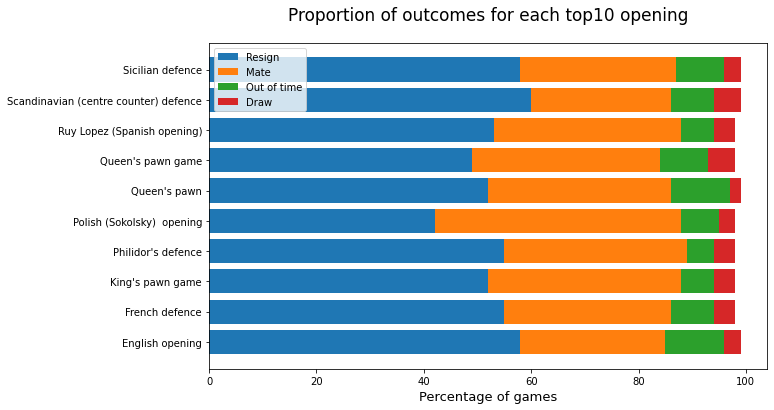

<Figure size 720x432 with 0 Axes>

In [110]:
x = list(df_results_per.index)

p_resign = df_results_per['%resign'].tolist()
p_mate = df_results_per['%mate'].tolist()
p_outoftime = df_results_per['%outoftime'].tolist()
p_draw = df_results_per['%draw'].tolist()

p_bottom_outoftime = list(np.add(p_resign, p_mate))
p_bottom_draw = list(np.add(p_bottom_outoftime, p_outoftime))

plt.barh(x, p_resign, 0.8, label='Resign')
plt.barh(x, p_mate, 0.8, left=p_resign, label='Mate')
plt.barh(x, p_outoftime, 0.8, left=p_bottom_outoftime, label='Out of time')
plt.barh(x, p_draw, 0.8, left=p_bottom_draw, label='Draw')

plt.title('Proportion of outcomes for each top10 opening', y=1.05, fontsize=17)
plt.xlabel('Percentage of games', fontsize=13)
plt.legend(loc='best')
plt.figure(figsize=(10,6))
plt.show()

Although the proprtions bar chart reflects the data more clearly, it has not changed our findings. The frequency of the outcomes in our top_games database still shows resign and mate as the most occuring outcomes, followed by outoftime and lastly, draw.

#### What is the relationship between the avg_opening_ply (how many moves there are in the opening phase of the opening) per opening classification and the average number of turns for each opening classification?

It will be interesting to see if there is any correlation between these two metrics so the user knows what to expect as the average number of moves for the opening increases. Should they expect a shorter or longer game? We will generate a *scatter plot* to assess this correlation. First though, we should take a look at the average opening ply for each opening, so we can sense check our analyis.

In [111]:
df_avg_opeply = top_games.loc[:, ['opening' ,'avg_opening_ply']]

df_avg_opeply.set_index('opening', inplace=True)

df_avg_opeply.groupby(['opening']).mean().sort_values('avg_opening_ply', ascending=False)

,avg_opening_ply
opening,
Ruy Lopez (Spanish opening),6.6
Philidor's defence,6.0
King's pawn game,5.4
Scandinavian (centre counter) defence,5.4
Sicilian defence,4.1
French defence,4.0
Queen's pawn game,3.4
English opening,2.4
Queen's pawn,2.3


In [112]:
df_cor = top_games.loc[:, ['variation','avg_turns', 'avg_opening_ply']]

df_cor.set_index('variation', inplace=True)
df_cor

,avg_turns,avg_opening_ply
variation,,
English Opening: King's English Variation,63,2
English Opening: King's English Variation | Reversed Sicilian,70,3
English Opening: Anglo-Scandinavian Defense,61,2
English Opening: Symmetrical Variation,66,2
English Opening: Agincourt Defense,64,2
...,...,...
Sicilian Defense: McDonnell Attack,58,3
Sicilian Defense: Closed Variation,60,3
Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,65,5


In [113]:
df_cor['avg_turns_bins'] = pd.cut(df_cor['avg_turns'], bins=5, right=True, ordered=True)
df_cor.head(5)

,avg_turns,avg_opening_ply,avg_turns_bins
variation,,,
English Opening: King's English Variation,63,2,"(53.8, 67.6]"
English Opening: King's English Variation | Reversed Sicilian,70,3,"(67.6, 81.4]"
English Opening: Anglo-Scandinavian Defense,61,2,"(53.8, 67.6]"
English Opening: Symmetrical Variation,66,2,"(53.8, 67.6]"
English Opening: Agincourt Defense,64,2,"(53.8, 67.6]"


In [114]:

df_cor

,avg_turns,avg_opening_ply,avg_turns_bins
variation,,,
English Opening: King's English Variation,63,2,"(53.8, 67.6]"
English Opening: King's English Variation | Reversed Sicilian,70,3,"(67.6, 81.4]"
English Opening: Anglo-Scandinavian Defense,61,2,"(53.8, 67.6]"
English Opening: Symmetrical Variation,66,2,"(53.8, 67.6]"
English Opening: Agincourt Defense,64,2,"(53.8, 67.6]"
...,...,...,...
Sicilian Defense: McDonnell Attack,58,3,"(53.8, 67.6]"
Sicilian Defense: Closed Variation,60,3,"(53.8, 67.6]"
Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,65,5,"(53.8, 67.6]"


In [115]:
for each in list(df_cor['avg_turns_bins'].unique()):
    print(each)

(53.8, 67.6]
(67.6, 81.4]
(39.931, 53.8]
(95.2, 109.0]


## Interactive Dashboard

### Export top games dataframe to an excel csv so we can create a new notebook 
The notebook will contain the code for the interactive dashboard that we will create using Plotly and Dash

These will remain commented out as the code cells have already been run.

In [ ]:
#datatoexcel = pd.ExcelWriter("top games.xlsx", engine='xlsxwriter')

In [ ]:
#top_games.to_excel(datatoexcel, sheet_name='Sheet1')

In [ ]:
#datatoexcel.save()

### Export games dataframe to csv so we can use it in the variations dashboard

We will export the cleansed games dataframe to a csv so we can use the data in the variations dashboard for our top 10 variations.

Let's familiarise ourselves with the dataframe first.

In [116]:
games.head()

,game_id,rated,turns,victory_status,winner,moves,opening_eco,opening_classification,opening_name,opening_ply,...,move7,move8,move9,move10,white_wins,black_wins,draw,win_by_mate,win_by_resign,win_by_outoftime
0,HgKLWPsz,False,39,mate,white,"[e3, e6, d4, d6, Bd3, c6, Nf3, Be7, Nc3, Nf6]",A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,...,Nf3,Be7,Nc3,Nf6,1.0,0.0,0.0,1.0,0.0,0.0
1,wNK2HdLb,True,58,mate,black,"[a4, e5, h4, d5, b3, Nc6, e3, Bf5, Bb5, Ne7]",A00,Polish (Sokolsky) opening,Crab Opening,3,...,e3,Bf5,Bb5,Ne7,0.0,1.0,0.0,1.0,0.0,0.0
2,t7vvcwqO,True,96,resign,black,"[g3, e5, e4, Nf6, Bg2, Bc5, a3, a5, Nc3, d6]",A00,Polish (Sokolsky) opening,Hungarian Opening,1,...,a3,a5,Nc3,d6,0.0,1.0,0.0,0.0,1.0,0.0
3,facMwkUo,True,39,mate,white,"[e3, e6, Qf3, Nf6, Nc3, Nc6, Nb5, a6, Nd4, Nxd4]",A00,Polish (Sokolsky) opening,Van't Kruijs Opening,1,...,Nb5,a6,Nd4,Nxd4,1.0,0.0,0.0,1.0,0.0,0.0
4,GstYv2mJ,False,28,mate,black,"[h4, e5, a4, d5, b4, Nc6, b5, Na5, g4, a6]",A00,Polish (Sokolsky) opening,Crab Opening,3,...,b5,Na5,g4,a6,0.0,1.0,0.0,1.0,0.0,0.0


In [118]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11602 entries, 0 to 19624
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 11602 non-null  object 
 1   rated                   11602 non-null  bool   
 2   turns                   11602 non-null  int64  
 3   victory_status          11602 non-null  object 
 4   winner                  11602 non-null  object 
 5   moves                   11602 non-null  object 
 6   opening_eco             11602 non-null  object 
 7   opening_classification  11602 non-null  object 
 8   opening_name            11602 non-null  object 
 9   opening_ply             11602 non-null  int64  
 10  move1                   11602 non-null  object 
 11  move2                   11602 non-null  object 
 12  move3                   11602 non-null  object 
 13  move4                   11602 non-null  object 
 14  move5                   11602 non-null

In [120]:
datatoexcel1 = pd.ExcelWriter('games.xlsx', engine='xlsxwriter')

In [121]:
games.to_excel(datatoexcel1, sheet_name='Sheet1')

In [122]:
datatoexcel1.save()